In [14]:
from players import rebel_player, random_player
import matplotlib.pyplot as plt
from games.coin_game import CoinGame
import numpy as np

In [2]:
game = CoinGame()

In [12]:
def run_tournament(players, game, num_games = 100):
    scores = []
    for i in range(num_games):
        h1,h2 = game.sample_hands()
        agents = [players[0](game, h1), players[1](game, h2)]
        current_state = ('root',)
        last_move = None
        turn = 0
        while not game.is_terminal(current_state):
            last_move = agents[turn].take_action(last_move)
            current_state = (*current_state, last_move)
            turn = 1-turn
        scores.append(game.get_rewards(node_id = current_state)[h1])
    return(np.array(scores))
    

In [8]:
players = [random_player, random_player]

In [9]:
game.is_terminal(('root', 1, 1))

True

In [23]:
results = run_tournament(players, game, 1000000)

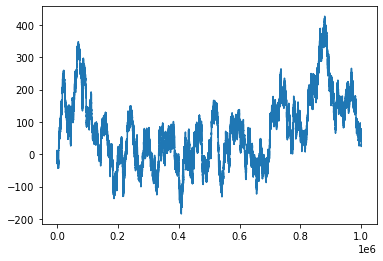

In [24]:
plt.plot(results.cumsum())

(array([249710.,      0., 250176.,      0.,      0.,      0.,      0.,
        250574.,      0., 249540.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

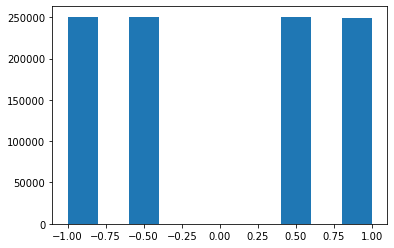

In [28]:
plt.hist(results)

In [22]:
250/10000

0.025